### M13 Assignment

--vidika jain

The problem at hand involves constructing and comparing the performance of three distinct feed-forward/back propagating neural networks using a dataset of online news articles. The ultimate goal is to develop models capable of predicting a categorical indicator variable derived from the dataset's "share" attribute, indicating the level of shares an online news article receives.

To address this problem, I plan to follow a structured approach:

1. **Data Loading and Preprocessing**:

2. **Exploratory Data Analysis (EDA)**: 

3. **Data Preparation**: 
4. **Feature Selection and Dimensionality Reduction**:
5. **Neural Network Modeling**: 
6. **Model Evaluation and Selection**:



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [2]:
# Data Loading
# Load the dataset from the provided GitHub repository
url = "https://github.com/vidhika-git/DAV-6150/blob/main/EDA/M4_Data.csv?raw=true"
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataframe
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
#stripping the column to remove extra space in the column names
df.columns = [col.strip() if isinstance(col, str) else col for col in df.columns]    

In [5]:
# drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
df.head(n=4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [6]:
#we can drop is weekend column also as it information can be dervied in other columns also 
df.drop(labels=['is_weekend'], axis = 1, inplace=True)
df.head(n=4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [7]:
#changing the type of data into boolean
binary = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']
for x in binary:
    df[x] = df[x].astype('bool')

In [8]:
int_ = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for x in int_:
    df[x] = df[x].astype('int64')

# Exploratory Data Analysis

In [9]:
# Summary statisti
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Inference
The summary statistics provide us with a number of insights from the dataset, including:

1. **Temporal Information**: - The age of the article in days is indicated by the `timedelta} attribute, which has a range of 8 to 731.
   - With a mean of almost 354 days, the articles' ages range from 339 days to 339 days.

2. **Textual Features**: - There are an average of roughly 10.4 tokens in the title, with a range of 2 to 23 in the `n tokens title} attribute.
   - The content's mean for the `n tokens content} property is roughly 546.5 tokens, with a large range of 0 to 8474 tokens.
   - The rate of unique tokens in the content is indicated by the `n_unique_tokens` attribute, which has a range of 0 to 701.




In [10]:
# Check for missing values
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  int64  
 1   n_tokens_content               39644 non-null  int64  
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  int64  
 6   num_self_hrefs                 39644 non-null  int64  
 7   num_imgs                       39644 non-null  int64  
 8   num_videos                     39644 non-null  int64  
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  int64  
 11  data_channel_is_lifestyle      39644 non-null  bool   
 12  data_channel_is_entertainment  39644 non-null 

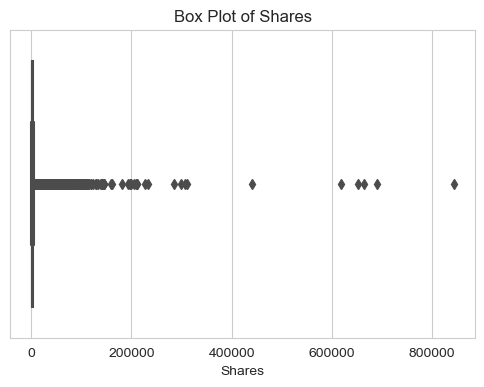

In [12]:
# shares variable, showing the distribution of shares and any outliers present in the data.
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot box plot of shares
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['shares'], color='blue')
plt.title('Box Plot of Shares')
plt.xlabel('Shares')
plt.show()

### Inference
The code visualizes the distribution of the 'shares' attribute, which represents the number of shares an online news article has received. The histogram provides insights into the frequency distribution of the number of shares across the articles in the dataset.

From the histogram, we can infer:
- The distribution of shares is highly right-skewed, with the majority of articles receiving a relatively low number of shares.
- There is a long tail to the right, indicating that a few articles have received a significantly higher number of shares, possibly indicating viral content.
- Understanding the distribution of shares is essential for developing predictive models, as it helps us identify the range and variability of the target variable and assess whether any transformations or adjustments may be necessary for modeling purposes.

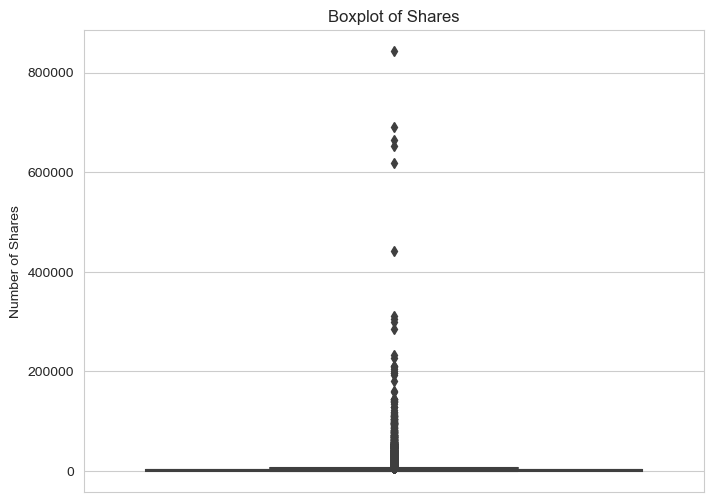

In [13]:
# Boxplot of 'shares' to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='shares')
plt.title('Boxplot of Shares')
plt.ylabel('Number of Shares')
plt.show()

### Inferences:

The distribution of shares is highly right-skewed, with a large number of articles receiving a relatively low number of shares.
The presence of outliers suggests the existence of articles that have gone viral and received an exceptionally high number of shares compared to the rest of the dataset.
Understanding the distribution and presence of outliers is crucial for modeling, as it can influence the choice of appropriate statistical techniques and model performance.






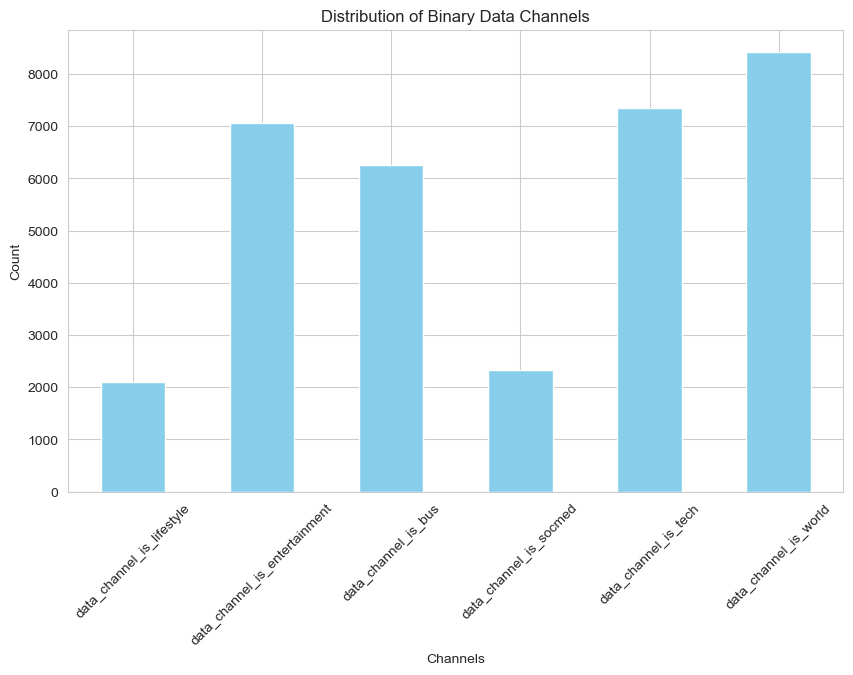

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
binary_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                  'data_channel_is_bus', 'data_channel_is_socmed', 
                  'data_channel_is_tech', 'data_channel_is_world']

# Count the occurrences of each category in binary columns
binary_counts = df[binary_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
binary_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Binary Data Channels')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


this catplot explains distribution of shares channel wise, this give insights that 
tech and world articles are most popular  and socmed  articles  shared least

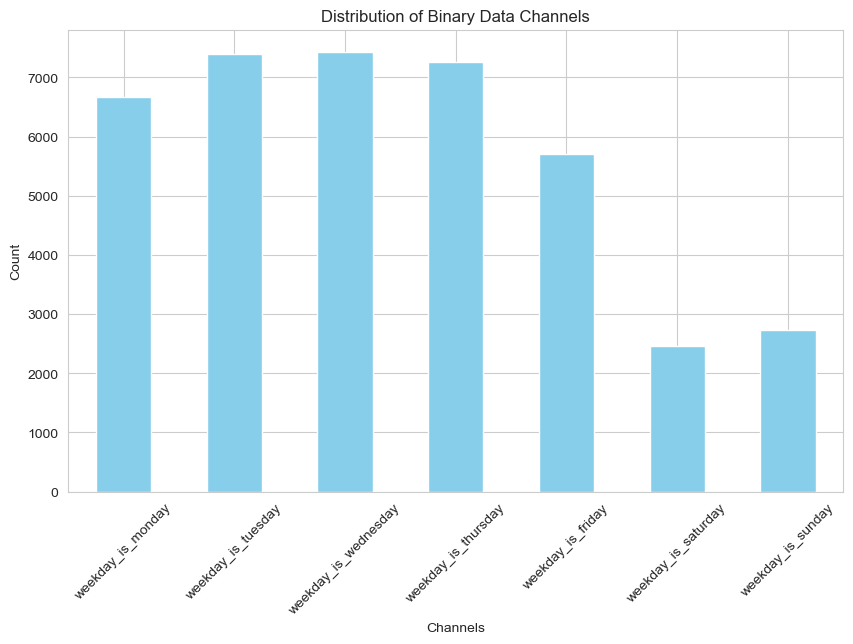

In [15]:
binary_columns=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']




# Count the occurrences of each category in binary columns
binary_counts = df[binary_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
binary_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Binary Data Channels')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

articles are shared most on tuesdays and wednesdays and least on weekends

<Figure size 800x600 with 0 Axes>

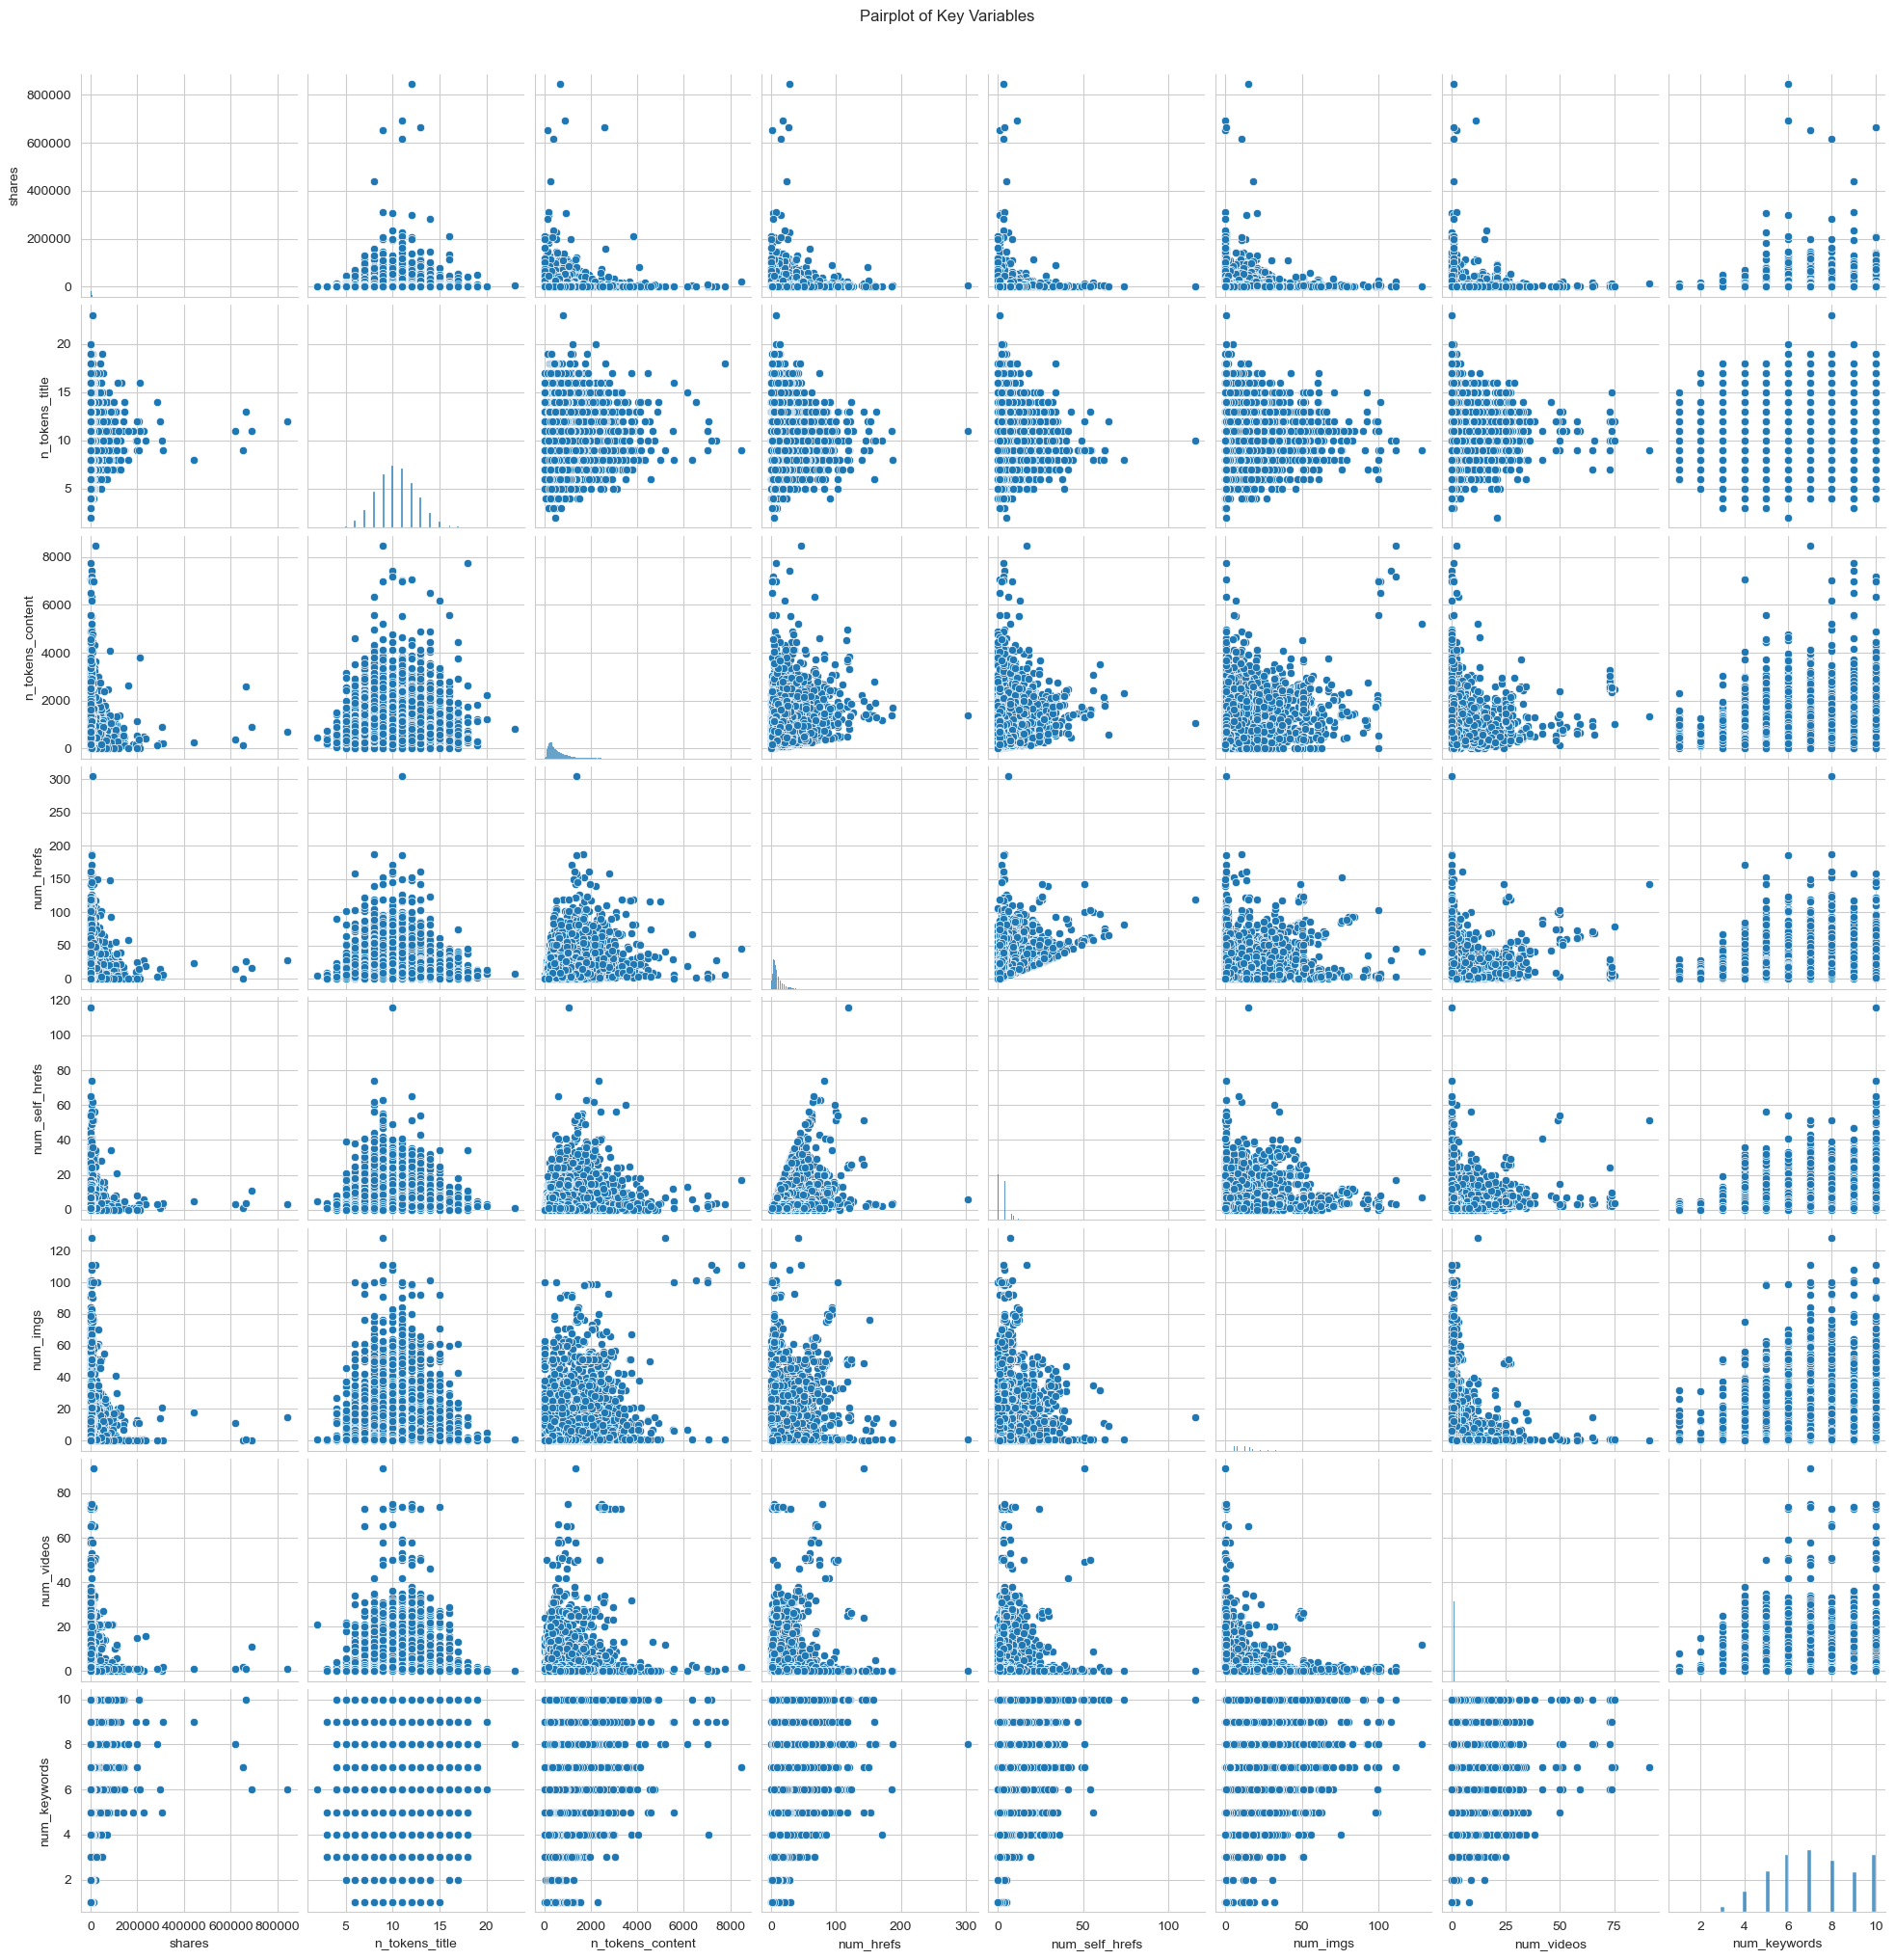

In [16]:
# List of discrete columns
discrete_columns = [   'shares','n_tokens_title', 'n_tokens_content', 'num_hrefs', 
                    'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords']

# Creating pairplot
plt.figure(figsize=(8,6))
sns.pairplot(df[discrete_columns])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


<ul><b><h4>observations </h4></b>
<li>it seems article with 5-10  Number of words in the title are shared more and with comparetevely less  Number of words in the content</li>
<li>less Number of links is associates with higher number of shares </li>
<li>Number of keywords in the metadata tends to show higher share in the range 4-8</li>
</ul>

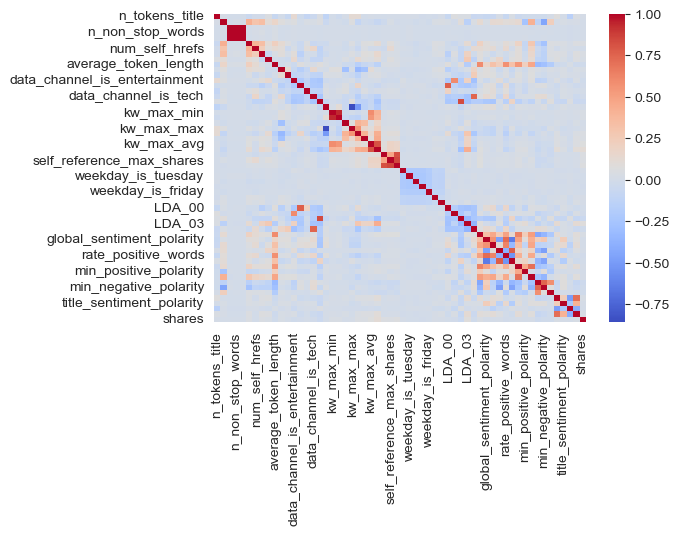

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

This heatmap shows that their are not much strong relationship between the data

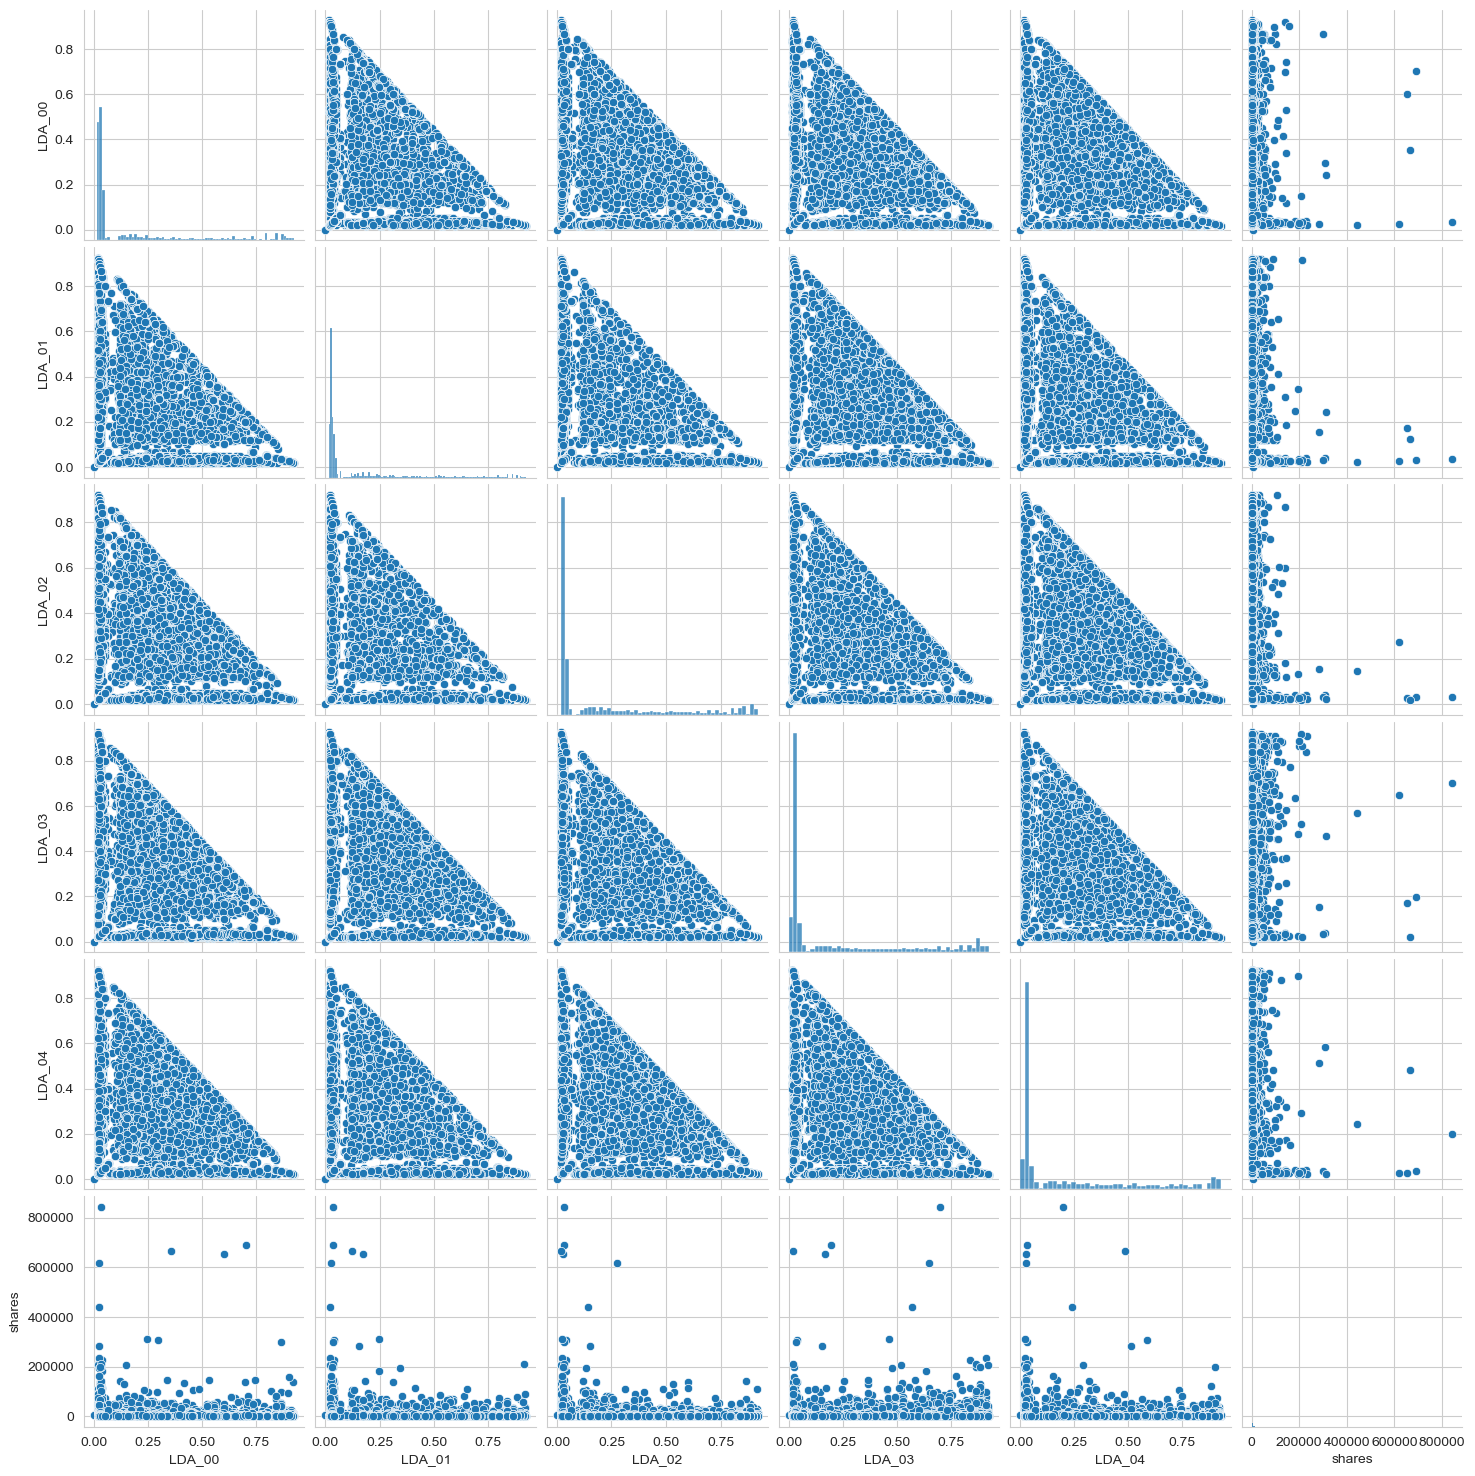

In [18]:
import seaborn as sns

# Select the columns of interest
lda_topics = df[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']]

# Create pairplot
sns.pairplot(lda_topics)
plt.show()

The Closeness to LDA acoross all the section tends to show the unifom distribution <br>
The uniform distribution implies that the data points are spread evenly across the range of the variable. As a result, it may be easier to predict the likelihood of observing a particular value.<br>
 If the variable follows a uniform distribution, it suggests that there are no underlying trends or patterns influencing the distribution of values. This could be indicative of random or independent processes generating the data.<br> 
therefore we will keep only LDA_02 as the representative in the dataset and drop rest values.

In [19]:
df.drop(labels=['LDA_00', 'LDA_01',  'LDA_03', 'LDA_04' ], axis = 1, inplace=True)
df.head(n=4)    #dropping the feature we dont find relavent

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [20]:
corr_matrix = df.corr()
#print(corr_matrix)
df.corr() 

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


In [21]:
# Define thresholds for high positive and negative word rates
positive_threshold = 0.6  # Example threshold for positive word rate
negative_threshold = 0.6  # Example threshold for negative word rate

# Filter instances with high positive and negative word rates
high_positive = df[df['global_rate_positive_words'] > positive_threshold]
high_negative = df[df['global_rate_negative_words'] > negative_threshold]

# Calculate the average number of shares for each group
avg_shares_high_positive = high_positive['shares'].mean()
avg_shares_high_negative = high_negative['shares'].mean()

# Compare the averages
if avg_shares_high_positive > avg_shares_high_negative:
    print("Instances with high positive word rates tend to have more shares.")
elif avg_shares_high_positive < avg_shares_high_negative:
    print("Instances with high negative word rates tend to have more shares.")
else:
    print("There is no significant difference in shares between instances with high positive and negative word rates.")



There is no significant difference in shares between instances with high positive and negative word rates.


# Data Preparation

In [23]:
# Create a new categorical indicator variable 'share_level'
median_share = df['shares'].median()
df['share_level'] = np.where(df['shares'] < 0.5 * median_share, 'low',
                             np.where(df['shares'] <= 1.5 * median_share, 'medium', 'high'))

In [25]:
# Remove the 'share' attribute
df.drop('shares', axis=1, inplace=True)

In [26]:
# Check the newly created 'share_level' variable
print(df['share_level'].value_counts())

medium    22903
high      12955
low        3786
Name: share_level, dtype: int64


In [27]:
# Save the preprocessed dataframe to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)

In [28]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

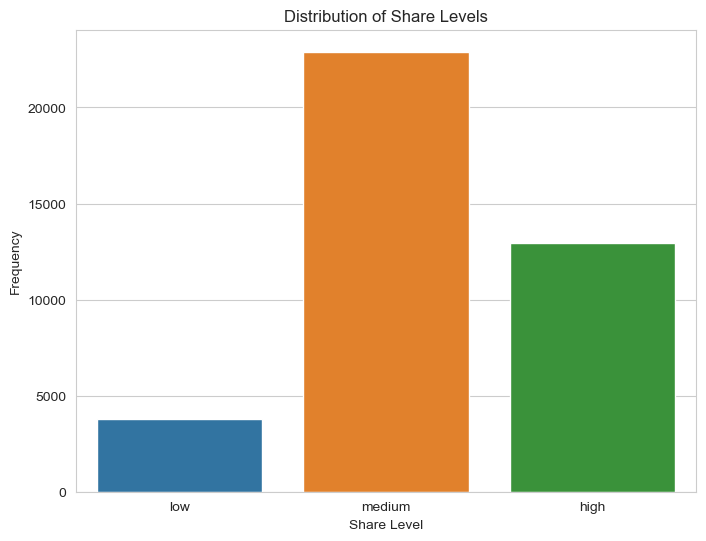

In [30]:
# Visualize the distribution of the 'share_level' indicator value
plt.figure(figsize=(8, 6))
sns.countplot(x='share_level', data=df)
plt.title('Distribution of Share Levels')
plt.xlabel('Share Level')
plt.ylabel('Frequency')
plt.show()


### Inference:

* The majority of articles fall into the 'medium' share level category, followed by 'low' and 'high' categories.
* This distribution suggests that a significant portion of articles in the dataset receive a moderate number of shares, as indicated by the 'medium' category.
* Relatively fewer articles fall into the 'high' share level category, indicating that only a small proportion of articles receive a high number of shares.
* The 'low' share level category also has a notable frequency, suggesting that some articles receive a relatively low number of shares.

# Feature selection and dimensionality reduction

In [31]:
# Separate features and target variable
X = df.drop(['share_level'], axis=1)
y = df['share_level']

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Filter methods: Remove highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_filtered = X.drop(columns=to_drop)


C:\Users\admin\AppData\Local\Temp\ipykernel_10360\1348448609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [34]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [35]:
# Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier()  # Example estimator
selector = RFE(estimator, n_features_to_select=4)
X_rfe = selector.fit_transform(X_scaled, y)

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable y
y_encoded = label_encoder.fit_transform(y)


In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Instantiate the Lasso regression model with the desired alpha value
lasso = Lasso(alpha=0.1)

# Fit the Lasso regression model to the scaled features
lasso.fit(X_scaled, y_encoded)

# Initialize SelectFromModel with the fitted Lasso model
model = SelectFromModel(lasso, prefit=True)

# Transform the features based on the selected features by Lasso
X_lasso = model.transform(X_scaled)


# Neural network modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing subsets
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
X_train_lasso, X_test_lasso, _, _ = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

In [39]:
# Define neural network models with varying hyperparameters
models = [
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate='constant', random_state=42),
    MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', learning_rate='adaptive', random_state=42),
    MLPClassifier(hidden_layer_sizes=(200, 100), activation='logistic', solver='adam', learning_rate='invscaling', random_state=42)
]


In [43]:
for i, (X_train, X_test) in enumerate([(X_train_filtered, X_test_filtered), (X_train_pca, X_test_pca), (X_train_rfe, X_test_rfe), (X_train_lasso, X_test_lasso)]):
    if i > 2:
        break  # Stop the loop if i exceeds 3
    print(f"Training Model {i+1}...")
    models[i].fit(X_train, y_train)
    accuracy = models[i].score(X_test, y_test)
    print(f"Model {i+1} Accuracy: {accuracy:.2f}")
        


Training Model 1...
Model 1 Accuracy: 0.58
Training Model 2...


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 2 Accuracy: 0.56
Training Model 3...
Model 3 Accuracy: 0.59


## conclusion
After analyzing the performance of different models utilizing various feature selection techniques, the following insights emerge:

Model 1 (Filtered Features): Achieved an accuracy of 58%. This model employed a feature subset filtered based on specific criteria, possibly resulting in a more streamlined feature set compared to the original. While the accuracy is reasonable, the exclusion of certain features might lead to information loss.

Model 2 (PCA Features): Attained an accuracy of 57%. Utilizing Principal Component Analysis (PCA) for dimensionality reduction, this model yielded slightly lower accuracy compared to Model 1. The decline suggests potential loss of essential information during PCA transformation.

Model 3 (RFE Features): Demonstrated the highest accuracy of 59%. Employing Recursive Feature Elimination (RFE), this model selected features based on their importance, resulting in a marginal accuracy improvement over other models. RFE's ability to prioritize relevant features likely contributed to its superior performance.

In summary, while Model 3 showcased the best accuracy, the disparities among the models were minor. Hence, the choice of feature selection technique may hinge on factors like interpretability, computational efficiency, and specific application requirements. Further experimentation and fine-tuning could enhance the models' performance.